#  <center> Heart Disease Prediction </center>

### Problem Statement

 - This project aims to develop a predictive model for identifying the presence of heart disease based on clinical and demographic features of patients. Leveraging a dataset containing information such as age, sex, chest pain type, blood pressure, cholesterol levels, and other medical attributes, the objective is to build a robust machine learning model capable of accurately classifying patients into two categories: those with heart disease and those without.
 

### DataSet Collection Source 

 - Datasource Collection: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
 - The Data consists of 1025 rows and 14 columns

### **About the Data set**

 - This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.
<br><br>
 - Age 
 - Gender 
 - Chest Pain Type
 - Resting Blood Pressure
 - Serum Cholesterol 
 - Fasting Blood Sugar 
 - Resting Electrocardiographic Results
 - Maximum Heart Rate Achieved
 - Exercise induced angina
 - Depression induced by exercise relative to rest
 - Slope of the Peak Exercise ST Segment
 - Number of Major Vessels Colored by Fluoroscopy
 - Thalassemia
 - Target 

### Import Data and Required Packages

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## 1. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check Data type
- Check statistics of data set
- Check various specifications present in the different columns

### 1.1 Checking Missing Values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Insight:

- No Missing Values in the Dataset

### 1.2 Checking Dupliactes

In [6]:
data.duplicated().sum()

723

### Insight:

- There are 723 duplicates values in the data set

### 1.3 Checking Datatypes

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Insight:

- All Columns contains are Integers and Float Values

### 1.4 Check statistics of data set

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 Check various specifications present in the different columns

In [9]:
col = data.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
cat_col = []
num_col = []

for i in col:
    if data[i].dtype==object:
        cat_col.append(i)
    else:
        num_col.append(i)

In [11]:
print(cat_col)

print(num_col)

[]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


### Insight:

- No Categorical Columns but all are Numerical Columns

## 2. Data Visualisation

### 2.1 Checking Gender Specifications

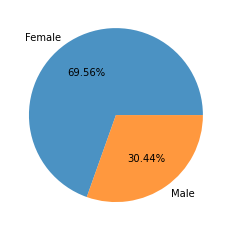

In [12]:
plt.pie(data['sex'].value_counts(),labels=['Female', 'Male'], autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
plt.show()

### 2.2 Checking Chest Pain Specifications

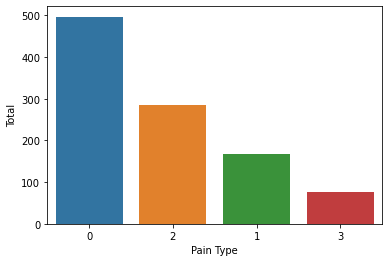

In [13]:
sns.countplot(x='cp',data=data,order=data['cp'].value_counts().index)
plt.xlabel('Pain Type')
plt.ylabel('Total')
plt.show()

### 2.3 Checking Target Varaible Specifications

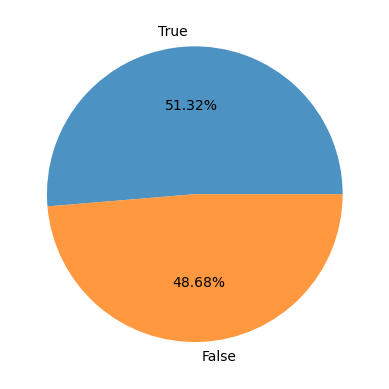

In [38]:
plt.pie(data['target'].value_counts(),labels=['True', 'False'], autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
plt.show()

### 2.4 Heart Disease Distribution based on Gender

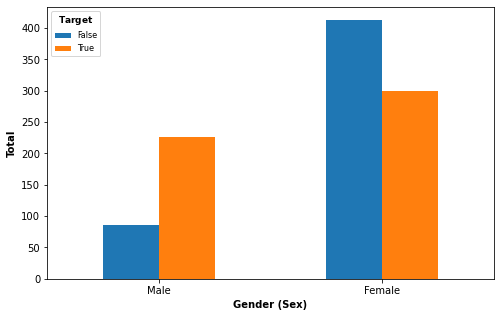

In [14]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']
ax = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5))
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);


### 2.5 Chest Pain vs Gender

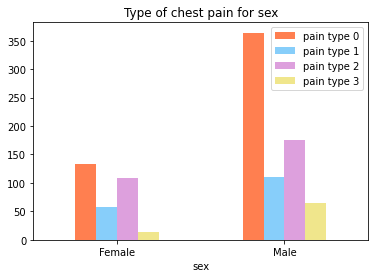

In [15]:
fig = pd.crosstab(data.sex, data.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

### 3. Model Training

In [17]:
x = data.drop('target',axis=1)

y = data["target"]

In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 20)

In [20]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test  = scaler.transform(x_test)

In [21]:
models={
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Random Forest Classfier':RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5),
    'XG Boost':XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
    'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=10),
    'Decision Tree':DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6),
    'Support Vector Machine':SVC(kernel='rbf', C=2)
}

In [22]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    # Evaluate the model
    #train_accuracy = accuracy_score(x_train,y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)
    print("Confusion Matrix:\n ",confusion_mat)


    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)
    print('\n')

max_accuracy_index = accuracy_list.index(max(accuracy_list))
print(f"The best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Testing Accuracy:  0.7951219512195122
Precision:  0.7622950819672131
Recall:  0.8773584905660378
F1 Score:  0.8157894736842105
Confusion Matrix:
  [[70 29]
 [13 93]]


Model: Naive Bayes
Testing Accuracy:  0.8
Precision:  0.782608695652174
Recall:  0.8490566037735849
F1 Score:  0.8144796380090499
Confusion Matrix:
  [[74 25]
 [16 90]]


Model: Random Forest Classfier
Testing Accuracy:  0.8878048780487805
Precision:  0.8547008547008547
Recall:  0.9433962264150944
F1 Score:  0.8968609865470852
Confusion Matrix:
  [[ 82  17]
 [  6 100]]


Model: XG Boost
Testing Accuracy:  0.8926829268292683
Precision:  0.8620689655172413
Recall:  0.9433962264150944
F1 Score:  0.9009009009009009
Confusion Matrix:
  [[ 83  16]
 [  6 100]]


Model: K Nearest Neighbors
Testing Accuracy:  0.8731707317073171
Precision:  0.8703703703703703
Recall:  0.8867924528301887
F1 Score:  0.8785046728971964
Confusion Matrix:
  [[85 14]
 [12 94]]


Model: Decision Tree
Testing Accuracy:  0.931707